In [1]:
import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)

import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
#import streamlit as st
import numpy as np
import plotly.graph_objects as go
import logging
import geopandas as gpd
import shapely
from geopy.geocoders import Nominatim
from scipy.spatial.distance import cdist
from shapely.wkt import loads
from functools import wraps
import time
import pickle
import contextily as ctx

In [62]:
with open('./data/Gf.pkl', 'rb') as input:
    G = pickle.load(input)
with open('./data/BoI_simple.pkl', 'rb') as input:
    BoI = pickle.load(input) 


In [63]:
gdNodes,gdStreets = ox.utils_graph.graph_to_gdfs(G)
gdNodes = gdNodes.to_crs("EPSG:4326")
print(gdNodes.crs)
gdNodes.head()

epsg:4326


,y,x,street_count,highway,ref,geometry
osmid,,,,,,
125730,48.863523,2.410732,4,NaN,NaN,POINT (2.41073 48.86352)
268675130,48.863483,2.410834,5,NaN,NaN,POINT (2.41083 48.86348)
2841627108,48.864623,2.410206,4,crossing,NaN,POINT (2.41021 48.86462)
244455548,48.862578,2.410915,4,NaN,NaN,POINT (2.41092 48.86258)
1089076050,48.863371,2.409049,4,NaN,NaN,POINT (2.40905 48.86337)


<AxesSubplot:>

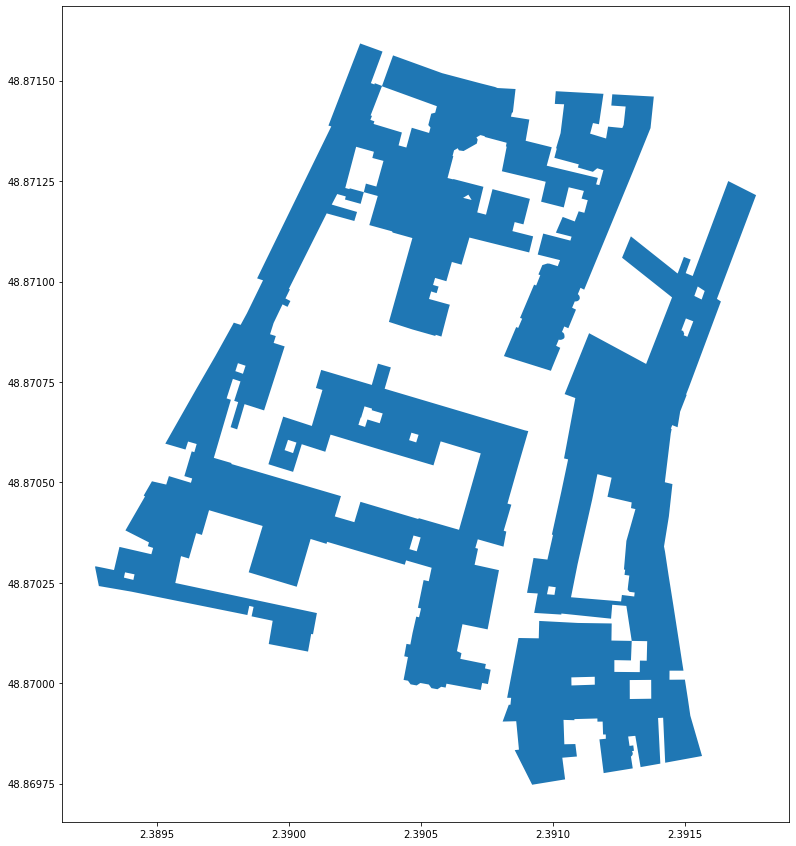

In [64]:
BAT = gpd.GeoDataFrame(BoI.reset_index())
BAT[13:15].plot( figsize=(15,15) )

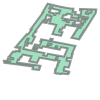

In [65]:
BAT.loc[14].geometry

In [66]:
import io
import re
import subprocess
import zlib
from itertools import chain

import numpy as np
from descartes import PolygonPatch
from shapely.affinity import translate
from shapely.geometry import LineString, Polygon
# import gobject-inspect, cairo and rsvg if the native rsvg SVG_RENDERER should be used
from shapely.ops import unary_union


# Creating shadows

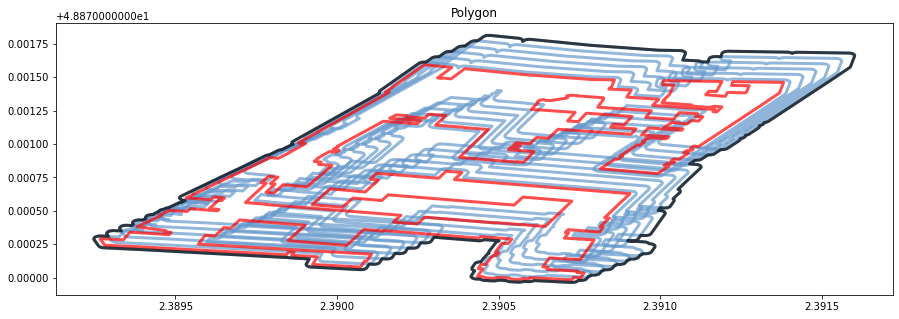

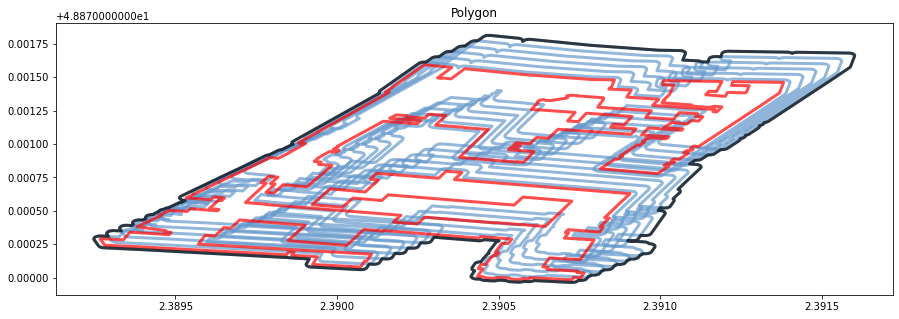

In [68]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

elevation = 5*4
blur_radius = elevation / 5 * 0.25/50000.0
init = [BAT.loc[14].geometry.buffer(blur_radius)]

for k in range(5):
    init.append(translate(init[-1],
                                xoff=(0.00004), yoff=(0.00004)) )
cu = unary_union(init)


for k in range(len(init)):
    X,Y = init[k].exterior.xy
    ax.plot(X, Y, color='#6699cc', alpha=0.7,
        linewidth=3, solid_capstyle='round', zorder=2)
    
x,y = BAT.loc[14].geometry.exterior.xy
ax.plot(x, y, color='red', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

x,y = cu.exterior.xy
ax.plot(x, y, color='black', alpha=0.7,
    linewidth=3, solid_capstyle='round', zorder=2)

ax.set_title('Polygon')
fig

# Let's make it industrial

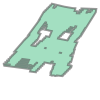

In [69]:
elevation = 5*4
blur_radius = elevation / 5 * 0.25/50000.0
def createShadow(geo):
    init = [geo]#.buffer(blur_radius)
    for k in range(5):
        init.append(translate(init[-1], xoff=(0.00004), yoff=(0.00004)) )
    cu = unary_union(init)
    return cu


createShadow(BAT.loc[14].geometry)

In [71]:
from tqdm import tqdm 
tqdm.pandas()

In [72]:
BAT["shade"] = ""
for bat in BAT:
    BAT["shade"] = BAT.geometry.progress_apply(lambda x: createShadow(x))

100%|██████████| 4718/4718 [00:47<00:00, 98.65it/s] 


In [73]:
BAT["shade"] 

0       POLYGON ((2.38993 48.85226, 2.38980 48.85223, ...
1       POLYGON ((2.39956 48.85306, 2.39957 48.85304, ...
2       POLYGON ((2.39862 48.85352, 2.39860 48.85352, ...
3       POLYGON ((2.40904 48.85491, 2.40905 48.85490, ...
4       POLYGON ((2.39815 48.86360, 2.39801 48.86350, ...
                              ...                        
4713    POLYGON ((2.35258 48.89334, 2.35258 48.89333, ...
4714    POLYGON ((2.38118 48.89340, 2.38120 48.89339, ...
4715    POLYGON ((2.33077 48.89343, 2.33077 48.89343, ...
4716    POLYGON ((2.38504 48.89333, 2.38507 48.89329, ...
4717    POLYGON ((2.38785 48.89282, 2.38786 48.89280, ...
Name: shade, Length: 4718, dtype: geometry

In [74]:
cBAT = BAT.drop(['geometry'], axis=1)
cBAT["geometry"] = cBAT["shade"] 
cBAT = cBAT.drop(['shade'], axis=1)

In [75]:
with open('data/BoI_shaded.pkl', 'wb') as output: 
    pickle.dump(cBAT, output)

<AxesSubplot:>

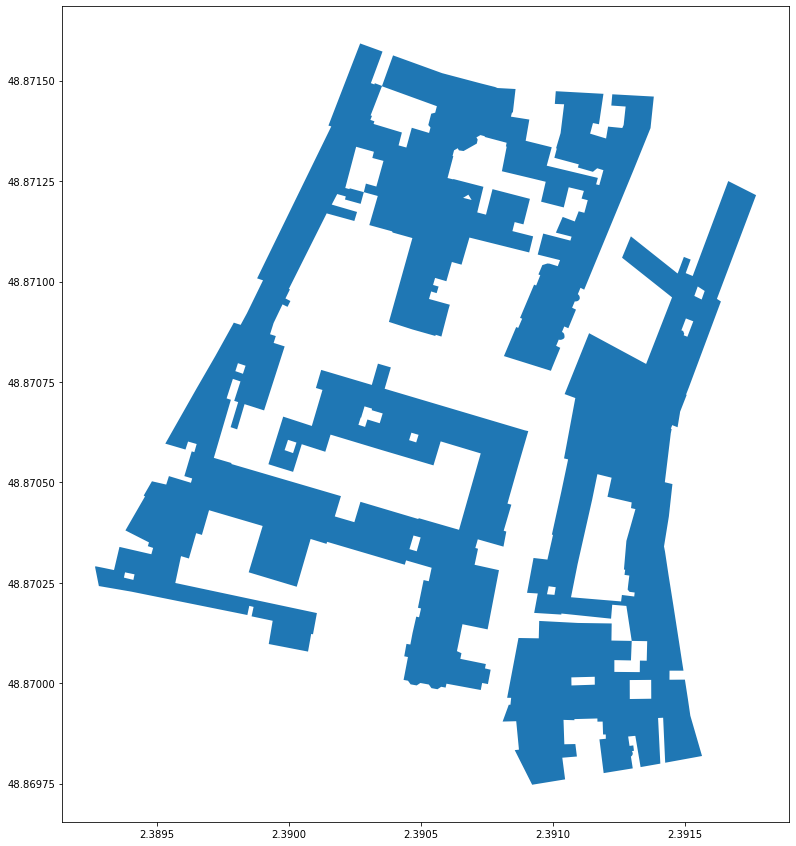

In [76]:
BAT = gpd.GeoDataFrame(BoI.reset_index())
BAT[13:15].plot( figsize=(15,15) )

<AxesSubplot:>

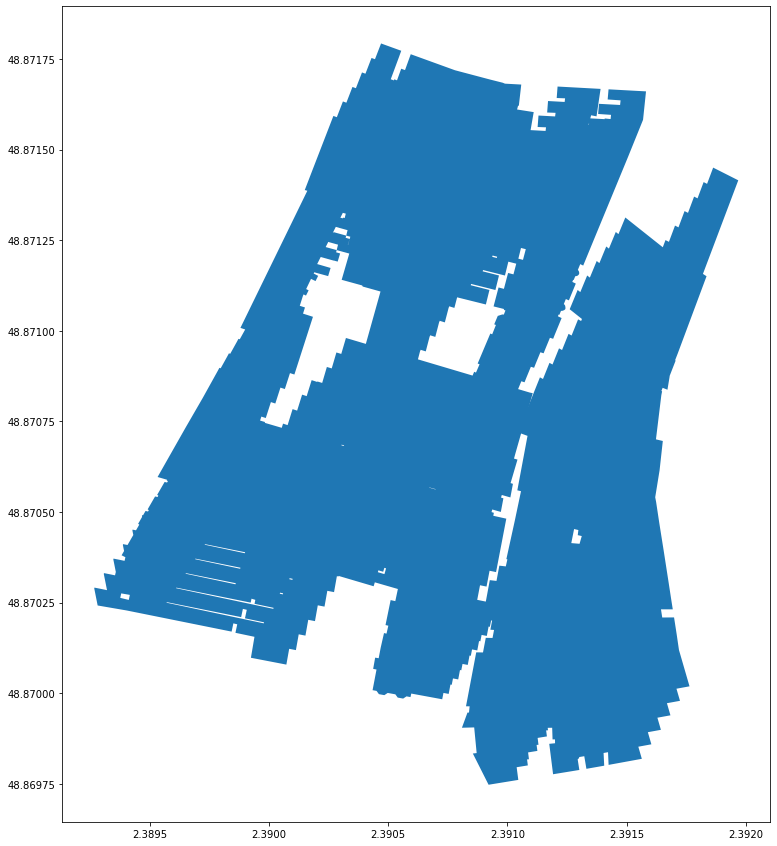

In [77]:
cBAT[13:15].plot( figsize=(15,15) )

In [78]:
BAT

,level_0,level_1,Name,Description,geometry
0,0,0,V,,"POLYGON ((2.38993 48.85226, 2.38980 48.85223, ..."
1,0,1,V,,"POLYGON ((2.39956 48.85306, 2.39957 48.85304, ..."
2,0,2,V,,"POLYGON ((2.39862 48.85352, 2.39860 48.85352, ..."
3,0,3,V,,"POLYGON ((2.40904 48.85491, 2.40905 48.85490, ..."
4,0,4,V,,"POLYGON ((2.39815 48.86360, 2.39801 48.86350, ..."
...,...,...,...,...,...
4713,0,4713,V,,"POLYGON ((2.35258 48.89334, 2.35258 48.89333, ..."
4714,0,4714,V,,"POLYGON ((2.38118 48.89340, 2.38120 48.89339, ..."
4715,0,4715,V,,"POLYGON ((2.33077 48.89343, 2.33077 48.89343, ..."
4716,0,4716,V,,"POLYGON ((2.38490 48.89356, 2.38507 48.89329, ..."


In [79]:
with open('./data/BoI_shaded.pkl', 'rb') as input:
    S = pickle.load(input)

In [80]:
import pickle
# Using this option to make sure we can open pickled dataframes back
pickle.HIGHEST_PROTOCOL = 4

<AxesSubplot:>

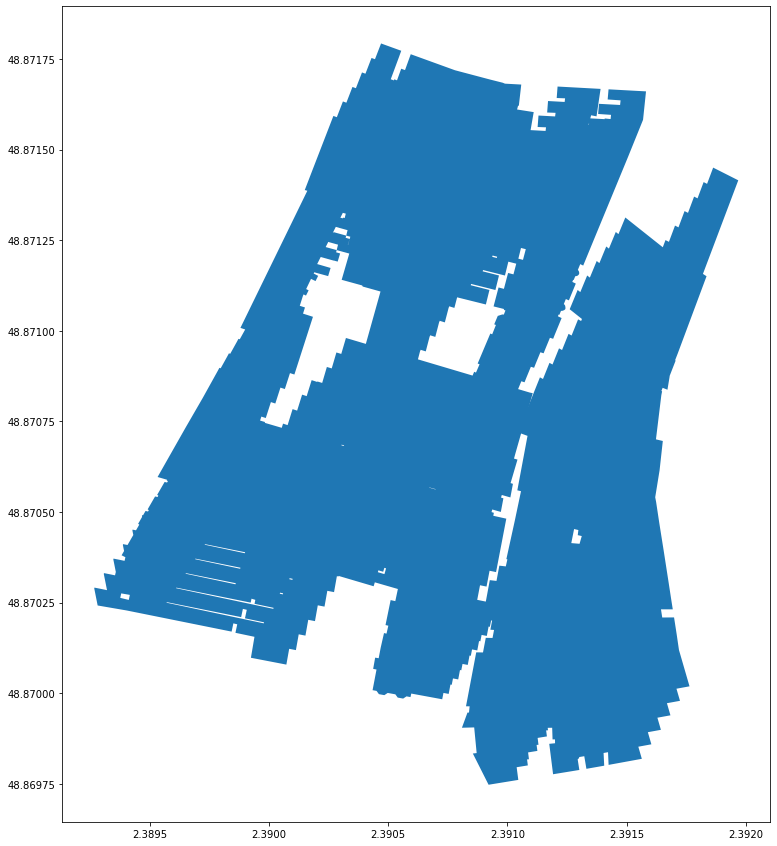

In [81]:
s = S[13:15]
s.plot( figsize=(15,15) )

<ipython-input-82-dd716d66c15f>:6: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  fx = s.buffer(eps, 1, join_style=JOIN_STYLE.mitre).buffer(-eps, 1, join_style=JOIN_STYLE.bevel)


<AxesSubplot:>

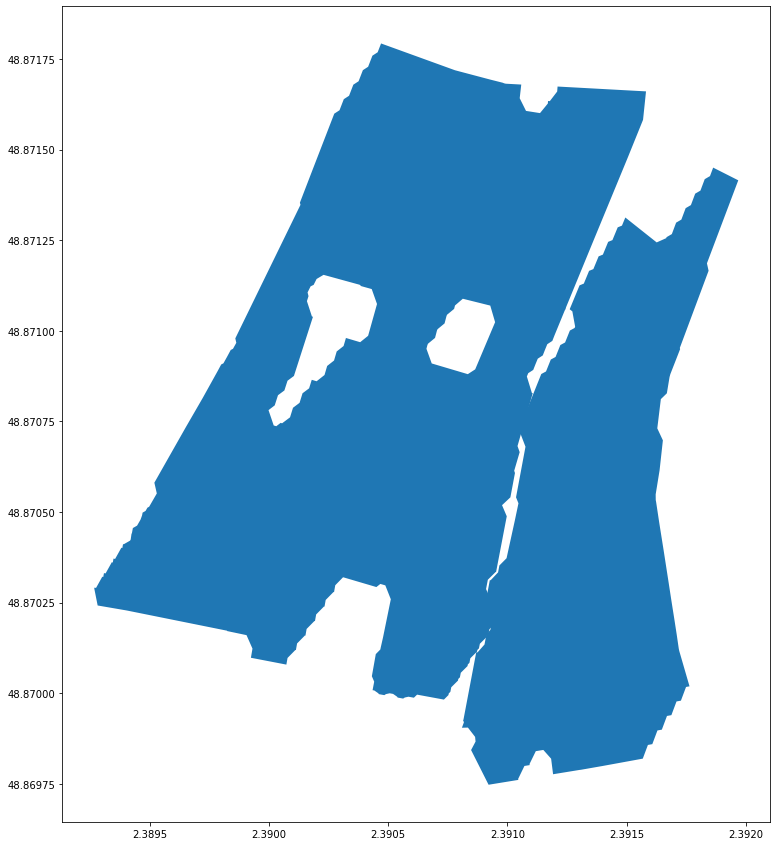

In [82]:
from shapely.geometry import shape, JOIN_STYLE
eps = 0.00003  # epsilon that is approx. the width of slivers, e.g. 1 mm

s = S[13:15]
# Here's the algorithm
fx = s.buffer(eps, 1, join_style=JOIN_STYLE.mitre).buffer(-eps, 1, join_style=JOIN_STYLE.bevel)

fx.plot( figsize=(15,15) )

In [83]:
fx = S.buffer(eps, 1, join_style=JOIN_STYLE.mitre).buffer(-eps, 1, join_style=JOIN_STYLE.bevel)


<ipython-input-83-5e4516002d59>:1: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  fx = S.buffer(eps, 1, join_style=JOIN_STYLE.mitre).buffer(-eps, 1, join_style=JOIN_STYLE.bevel)


In [84]:
S.geometry = fx

In [85]:
len(S)

4718

In [86]:
pickle.HIGHEST_PROTOCOL = 5
SS = S.dissolve().explode()
pickle.HIGHEST_PROTOCOL = 4
len(SS)

619

In [87]:
import pickle
# Using this option to make sure we can open pickled dataframes back
pickle.HIGHEST_PROTOCOL = 4
with open('data/BoI_shaded_simple.pkl', 'wb') as output: 
    pickle.dump(SS, output)

<AxesSubplot:>

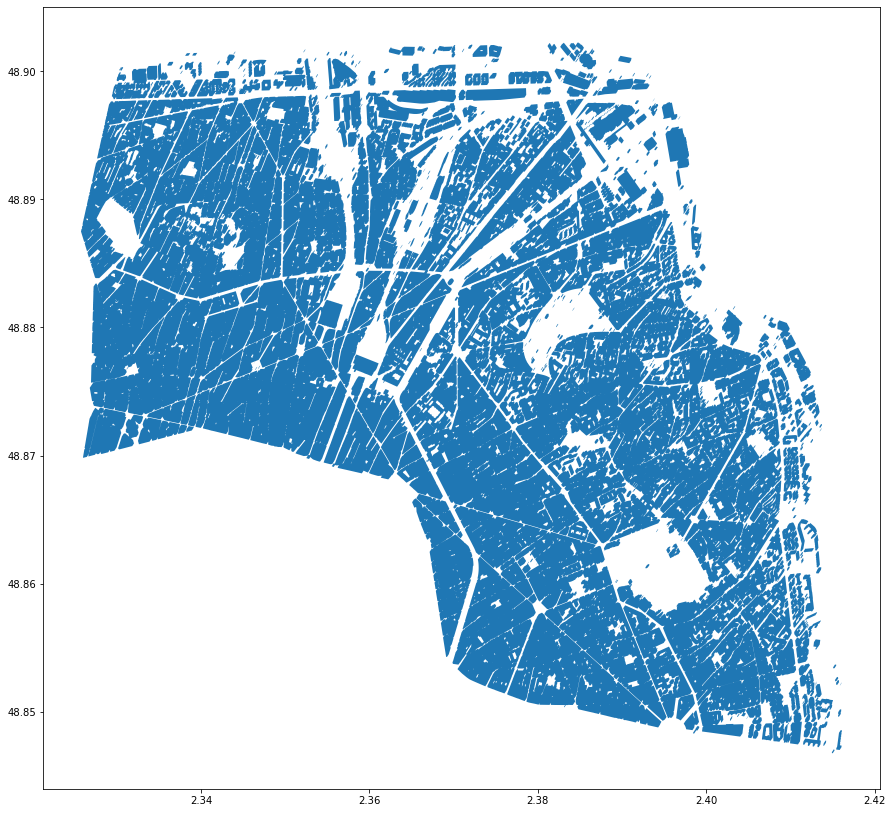

In [88]:
SS.plot(figsize=(15,15))

<AxesSubplot:>

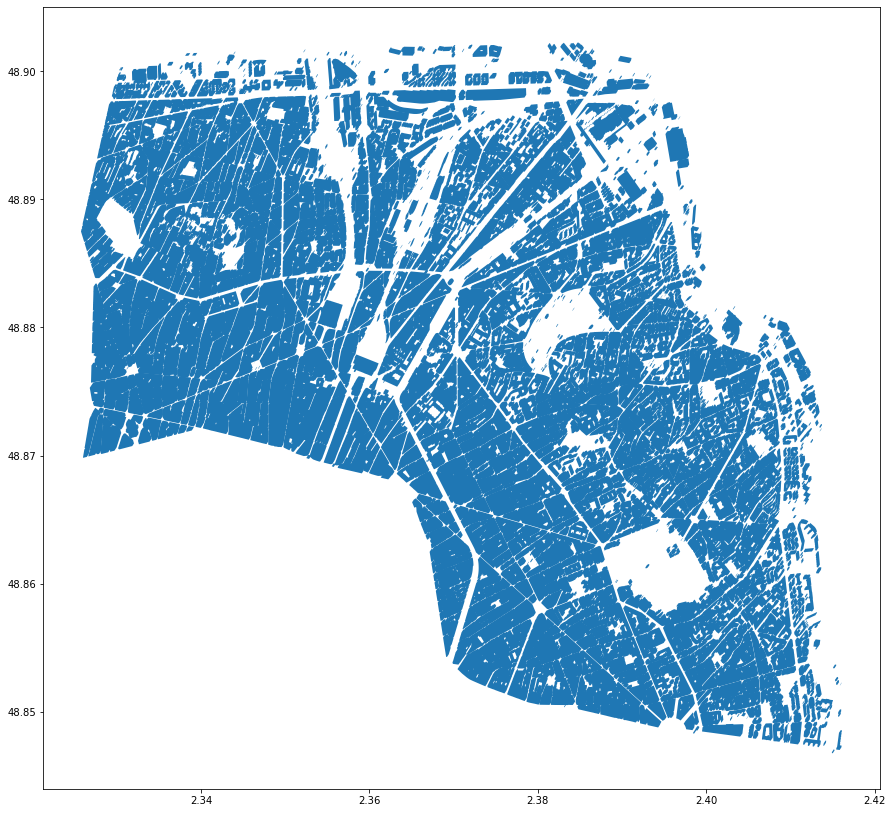

In [89]:
S.plot(figsize=(15,15))

In [90]:
1+1

2